In [1]:
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import vgg16, resnet50, mobilenet, inception_v3
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import os

%matplotlib inline


In [2]:
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
filename = '/content/deep_fake_image.jpeg'

In [5]:
filename

'/content/deep_fake_image.jpeg'

PIL image size (224, 224)


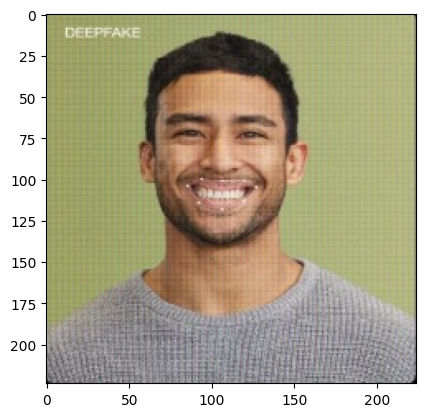

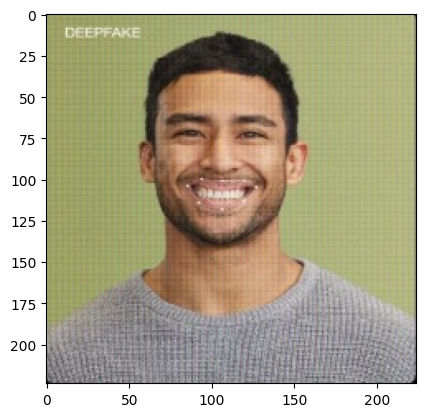

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


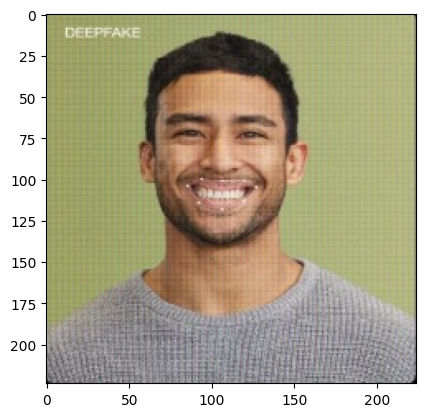

In [6]:
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [7]:

processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label_vgg = decode_predictions(predictions)
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
('n03595614', 'jersey', 0.46888325)
('n03000247', 'chain_mail', 0.065561496)
('n02916936', 'bulletproof_vest', 0.047310952)
('n02963159', 'cardigan', 0.034911565)
('n02834397', 'bib', 0.026442999)


In [8]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
for prediction_id in range(len(label_resnet[0])):
    print(label_resnet[0][prediction_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
('n03595614', 'jersey', 0.17840752)
('n03000247', 'chain_mail', 0.15437306)
('n02963159', 'cardigan', 0.06315135)


In [9]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)

for prediction_id in range(len(label_mobilenet[0])):
    print(label_mobilenet[0][prediction_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
('n03630383', 'lab_coat', 0.08254137)
('n04599235', 'wool', 0.076815754)
('n04328186', 'stopwatch', 0.06049799)
('n03930313', 'picket_fence', 0.0474511)
('n03595614', 'jersey', 0.047228526)


In [10]:

original = load_img(filename, target_size=(299, 299))

numpy_image = img_to_array(original)

image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())

predictions = inception_model.predict(processed_image)

label_inception = decode_predictions(predictions)

for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
('n04589890', 'window_screen', 0.19655122)
('n03000247', 'chain_mail', 0.16441579)
('n03595614', 'jersey', 0.1442746)
('n03980874', 'poncho', 0.05478836)
('n02963159', 'cardigan', 0.027450627)


In [11]:
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))
cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

False

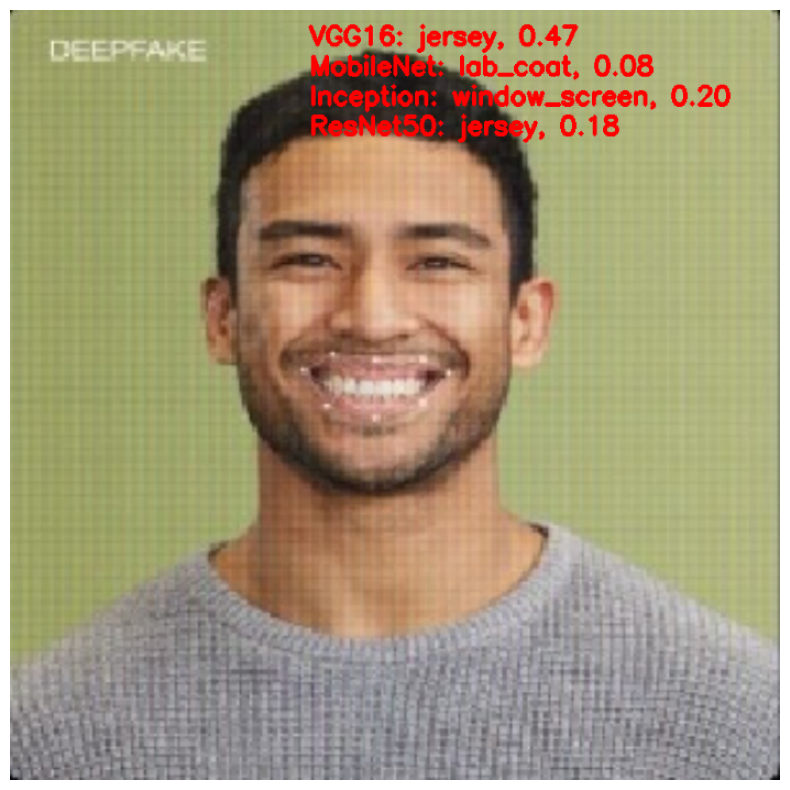

In [12]:
plt.figure(figsize=[10,10])
plt.axis('off')
plt.imshow(numpy_image)

In [13]:
!pip install pyngrok

In [14]:
from flask import Flask
from pyngrok import ngrok

In [15]:
port_no = 5000

In [19]:
hi=1

In [ ]:
# Import necessary libraries
from flask import Flask, request, jsonify
from tensorflow.keras.applications import vgg16, resnet50, mobilenet
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io
from pyngrok import ngrok

app = Flask(__name__)

vgg_model = vgg16.VGG16(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

def preprocess_image(img, target_size):
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    return img_batch

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image uploaded'}), 400

    file = request.files['image']
    img = Image.open(io.BytesIO(file.read()))

    img_vgg = preprocess_image(img, target_size=(224, 224))
    processed_image_vgg = vgg16.preprocess_input(img_vgg.copy())
    vgg_predictions = vgg_model.predict(processed_image_vgg)
    vgg_labels = decode_predictions(vgg_predictions, top=3)[0]

    img_resnet = preprocess_image(img, target_size=(224, 224))
    processed_image_resnet = resnet50.preprocess_input(img_resnet.copy())
    resnet_predictions = resnet_model.predict(processed_image_resnet)
    resnet_labels = decode_predictions(resnet_predictions, top=3)[0]

    img_mobilenet = preprocess_image(img, target_size=(224, 224))
    processed_image_mobilenet = mobilenet.preprocess_input(img_mobilenet.copy())
    mobilenet_predictions = mobilenet_model.predict(processed_image_mobilenet)
    mobilenet_labels = decode_predictions(mobilenet_predictions, top=3)[0]

    results = {
        'vgg16': [{'label': label, 'description': desc, 'score': float(score)} for (label, desc, score) in vgg_labels],
        'resnet50': [{'label': label, 'description': desc, 'score': float(score)} for (label, desc, score) in resnet_labels],
        'mobilenet': [{'label': label, 'description': desc, 'score': float(score)} for (label, desc, score) in mobilenet_labels],
    }

    return jsonify(results)

ngrok.set_auth_token("2lzGINHlenNLB4DzgZNfLTcAGoT_2jeg87bDrrKzLhFzZq6HZ")


port_no = 5000
public_url = ngrok.connect(port_no).public_url
print(f"To access the global link, please click {public_url}")


app.run(port=port_no)


To access the global link, please click https://5543-34-16-77-81.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


INFO:werkzeug:127.0.0.1 - - [13/Sep/2024 02:44:11] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


INFO:werkzeug:127.0.0.1 - - [13/Sep/2024 02:45:05] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


INFO:werkzeug:127.0.0.1 - - [13/Sep/2024 02:45:49] "POST /predict HTTP/1.1" 200 -
